In [1]:
import datetime
import numpy as np

def calculate_minutes_since_2000(date):
    start_date = datetime.datetime(2000, 1, 1)  # set start date to 1 January 2000
    return int((date - start_date).total_seconds() // 60)

import pandas as pd
def read_data(filename1):
    
    data = pd.read_csv(filename1, sep='\t')
    
    data['datetime'] = pd.to_datetime(data['5 Minutes'], format='%m/%d/%Y %H:%M')
    data['timeindex'] = data['datetime'].apply(lambda v: calculate_minutes_since_2000(v))
    data.set_index('timeindex', inplace=True)

    return data

In [14]:
import pandas as pd
import datetime

def extract_data_within_15(TOTAL):
    # Set the start date as the earliest date in the 'datetime' column of the TOTAL DataFrame
    start_date = TOTAL['datetime'].min().date()
    
    # Calculate the end date as two weeks after the start date
    end_date = start_date + datetime.timedelta(days=15)
    
    # Convert the 'datetime' column of the TOTAL DataFrame to a datetime dtype
    TOTAL['datetime'] = pd.to_datetime(TOTAL['datetime'])
    
    # Create a boolean index for rows that fall within the two-week period
    within_two_weeks = (TOTAL['datetime'].dt.date >= start_date) & (TOTAL['datetime'].dt.date < end_date)
    
    # Use boolean indexing to extract the rows within the two-week period
    data_within_15 = TOTAL[within_two_weeks]
    
    return data_within_15



import pandas as pd

def interpo(dt):
    tmp = dt.copy(deep=True)
    tmp = tmp.set_index('datetime')
    tmp = tmp.reindex()
    
    start_time = pd.to_datetime(tmp.index[0].strftime('%Y-%m-%d'))
    end_time = start_time + pd.DateOffset(days=14, hours=23, minutes=55)
    datetime_index = pd.date_range(start=start_time, end=end_time, freq='5T')
    
    return tmp.reindex(datetime_index).interpolate(method='bfill')


dt = pd.read_csv('SF_good.csv')
# for i in range(len(dt)):
#     row = dt.iloc[i]
    
#     try:
#         A = read_data('CSV/{}.csv'.format(row.ID))
#         B = read_data('PMW/{}.csv'.format(row.ID))
#         C = read_data('PMW2/{}.csv'.format(row.ID))
#         TOTAL = pd.concat([A,B,C],axis=0).sort_values(by='timeindex').reindex().interpolate(method='bfill')
#         TOTAL = TOTAL[~TOTAL.index.duplicated()].interpolate(method='bfill')

#         TOTAL = extract_data_within_15(TOTAL)
#     #     print(TOTAL['datetime'])

#         TOTAL = interpo(TOTAL)
#     #     TOTAL = TOTAL.reindex(TOTAL['datetime'])

#     #     start_time = pd.to_datetime(TOTAL.index[0].strftime('%Y-%m-%d'))
#     #     end_time = start_time + pd.DateOffset(days=15)
#     #     datetime_index = pd.date_range(start=start_time, end=end_time, freq='5T')
#     #     TOTAL = TOTAL.reindex(datetime_index)
#     #     start_time = TOTAL['timeindex'].iloc[0]
#     #     end_time = start_time + 14*288*5 #pd.DateOffset(days=14,hours=23,minutes=55)
#     #     datetime_index = pd.date_range(start=start_time, end=end_time)
#     #     TOTAL = TOTAL.reindex(datetime_index).interpolate(method='bfill')

#         TOTAL.to_csv('TOTAL2/'+row.ID+'.csv')
#     except:
#         pass

(0.0, 1.0)

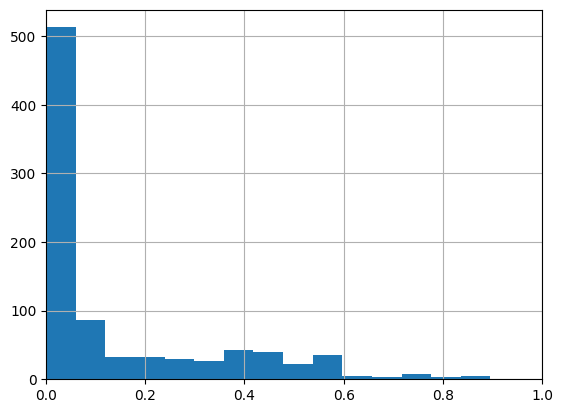

In [15]:
import matplotlib.pyplot as plt
dt[dt.Source=='Bing']['Distance(mi)'].hist(bins=50)
plt.xlim(0,1)

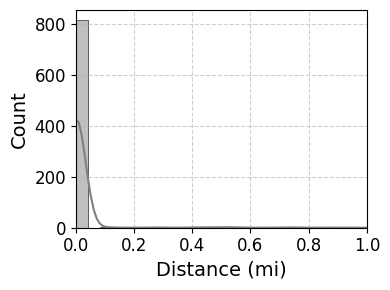

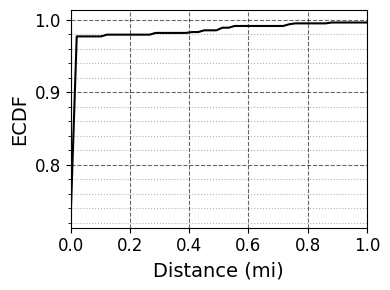

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

# Filter the data for the specific condition
bing_distances = dt[dt.Source == 'MapQuest']['Distance(mi)']

# Create the figure and axes for the histogram
fig1, ax1 = plt.subplots(figsize=(4,3))

# Plot the histogram and KDE
sns.histplot(bing_distances, ax=ax1, bins=50, kde=True, color='gray', edgecolor='black')

# Add labels for the histogram
ax1.set_xlabel('Distance (mi)', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xlim(0,1)

# Increase font size of ticks
ax1.tick_params(axis='both', which='major', labelsize=12)

# Add grid
ax1.grid(True, linestyle='--', alpha=0.6)

# Save and show the histogram plot
plt.tight_layout()
plt.savefig("bing_distances_histogram.pdf")
plt.show()



import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.distributions.empirical_distribution import ECDF

fig2, ax2 = plt.subplots(figsize=(4, 3))

# Calculate the ECDF
ecdf = ECDF(bing_distances)
x = np.linspace(min(bing_distances), max(bing_distances), 100)
y = ecdf(x)

# Plot the ECDF
ax2.plot(x, y, marker='', linestyle='-', color='black')

# Add labels for the ECDF
ax2.set_xlabel('Distance (mi)', fontsize=14)
ax2.set_ylabel('ECDF', fontsize=14)

# Increase font size of ticks
ax2.tick_params(axis='both', which='major', labelsize=12)

# Modify locators to have more grid lines
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))  # adjust these values as needed
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax2.set_xlim(0,1)
ax2.set_xticks(np.round(np.linspace(0,1,6),1))

# Enable major and minor grid lines
ax2.grid(True, which='major', color='black', linestyle='--', alpha=0.6)
ax2.grid(True, which='minor', color='black', linestyle=':', alpha=0.3)

# Save and show the ECDF plot
plt.tight_layout()
plt.savefig("bing_distances_ecdf.pdf")
plt.show()


In [13]:
len(dt[dt.Source == 'Bing']['Distance(mi)'])

899

In [40]:
import numpy as np
import pandas as pd

# calculate mean
mean_val = np.mean(bing_distances)

# calculate median
median_val = np.median(bing_distances)

# calculate 0.95 quantile
quantile_95 = np.quantile(bing_distances, 0.95)

# calculate 0.05 quantile
quantile_05 = np.quantile(bing_distances, 0.05)

# calculate standard deviation
std_dev = np.std(bing_distances)

# calculate variance
variance = np.var(bing_distances)

# calculate interquartile range
iqr = np.quantile(bing_distances, 0.75) - np.quantile(bing_distances, 0.25)

print("Mean: ", mean_val)
print("Median: ", median_val)
print("0.95 Quantile: ", quantile_95)
print("0.05 Quantile: ", quantile_05)
print("Standard Deviation: ", std_dev)
print("Variance: ", variance)
print("Interquartile Range: ", iqr)

Mean:  0.1628743047830923
Median:  0.037
0.95 Quantile:  0.573
0.05 Quantile:  0.0
Standard Deviation:  0.27455244356489217
Variance:  0.07537904426745329
Interquartile Range:  0.267


In [44]:
import numpy as np
import pandas as pd

# calculate and round statistics
mean_val = format(round(np.mean(bing_distances), 2), '.2f').rstrip('0').rstrip('.')
median_val = format(round(np.median(bing_distances), 2), '.2f').rstrip('0').rstrip('.')
quantile_95 = format(round(np.quantile(bing_distances, 0.95), 2), '.2f').rstrip('0').rstrip('.')
quantile_05 = format(round(np.quantile(bing_distances, 0.05), 2), '.2f').rstrip('0').rstrip('.')
std_dev = format(round(np.std(bing_distances), 2), '.2f').rstrip('0').rstrip('.')
variance = format(round(np.var(bing_distances), 2), '.2f').rstrip('0').rstrip('.')
iqr = format(round(np.quantile(bing_distances, 0.75) - np.quantile(bing_distances, 0.25), 2), '.2f').rstrip('0').rstrip('.')

# create a pandas DataFrame
df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', '0.95 Quantile', '0.05 Quantile', 'Standard Deviation', 'Variance', 'Interquartile Range'],
    'Value': [mean_val, median_val, quantile_95, quantile_05, std_dev, variance, iqr]
})

# print LaTeX table
print(df.to_latex(index=False))


\begin{tabular}{ll}
\toprule
Statistic & Value \\
\midrule
Mean & 0.16 \\
Median & 0.04 \\
0.95 Quantile & 0.57 \\
0.05 Quantile & 0 \\
Standard Deviation & 0.27 \\
Variance & 0.08 \\
Interquartile Range & 0.27 \\
\bottomrule
\end{tabular}



(0.0, 1.0)

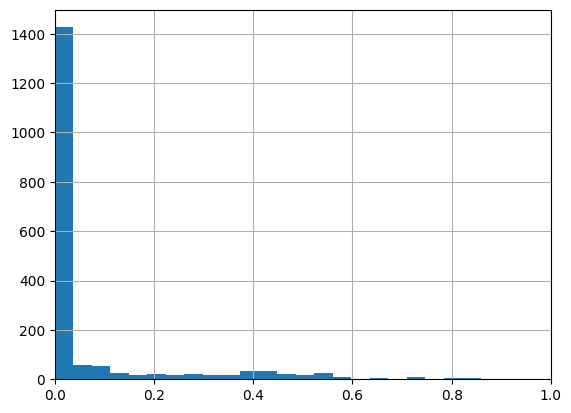

In [15]:
import matplotlib.pyplot as plt
dt['Distance(mi)'].hist(bins=80)
plt.xlim(0,1)

In [17]:
dt['Distance(mi)'][dt['Distance(mi)']>0][dt.Source=='Bing'].mean()

0.26574228675136113

C:\Users\A\AppData\Local\Temp\ipykernel_18808\1978198763.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')


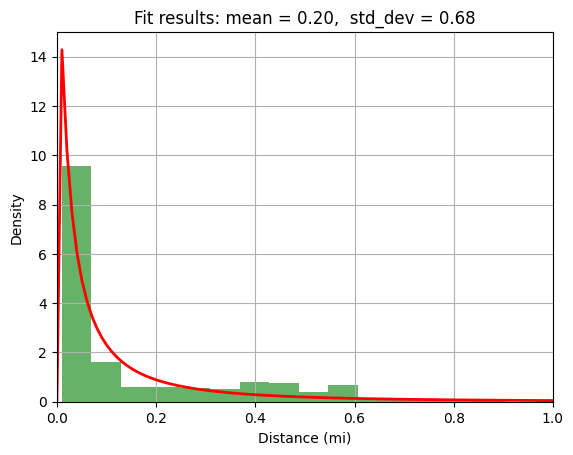

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Filter your data and get the relevant distances
distances = dt[dt.Source=='Bing']['Distance(mi)']+0.01

# Fit a log-normal distribution
shape, loc, scale = stats.lognorm.fit(distances, floc=0)

# Plot histogram
plt.hist(distances, bins=50, density=True, alpha=0.6, color='g')

# Plot PDF of the log-normal distribution fitted to the data
xmin, xmax = plt.xlim(0,1)
x = np.linspace(xmin, xmax, 100)
p = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2, color='r')

# Calculate and display mean and standard deviation in title
mean, var = stats.lognorm.stats(shape, loc, scale, moments='mv')
std_dev = np.sqrt(var)
title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

# Add axis labels
plt.xlabel('Distance (mi)')
plt.ylabel('Density')
plt.grid()
# Save figure as PDF
plt.savefig('histogram.pdf')

# Show the plot
plt.show()


In [116]:
TOTAL['Speed (mph)'].values

array([69.1, 68.2, 69.5, ..., 68.2, 68.8, 69.5])

In [118]:
np.ones(len(TOTAL['Speed (mph)']))*TOTAL['Speed (mph)'].values.mean()

array([59.93907592, 59.93907592, 59.93907592, ..., 59.93907592,
       59.93907592, 59.93907592])

In [144]:
tmp = TOTAL.copy()

tmp = tmp.set_index('datetime')
tmp = tmp.reindex()

start_date = pd.to_datetime(tmp.index[0].strftime('%Y-%m-%d'))
end_time = start_time + pd.DateOffset(days=14, hours=23, minutes=55)
datetime_index = pd.date_range(start=start_time, end=end_time, freq='5T')
tmp.reindex(datetime_index).interpolate(method='bfill')

# pd.to_datetime(TOTAL['5 Minutes'], format='%m/%d/%Y %H:%M')

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
2019-04-23 00:00:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:05:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:10:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:15:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:20:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
...,...,...,...,...,...,...,...,...,...
2019-05-07 23:35:00,05/07/2019 23:35,17.0,69.7,12.0,64.3,29.0,67.5,2.0,0.0
2019-05-07 23:40:00,05/07/2019 23:40,23.0,70.1,15.0,64.4,38.0,67.8,2.0,0.0
2019-05-07 23:45:00,05/07/2019 23:45,19.0,70.4,12.0,64.6,31.0,68.2,2.0,0.0
2019-05-07 23:50:00,05/07/2019 23:50,20.0,71.1,12.0,64.9,32.0,68.8,2.0,0.0


In [150]:


interpolate_data(TOTAL)

KeyError: "None of ['datetime'] are in the columns"

In [141]:
import pandas as pd

def fill_missing_data(data):
    # make a copy of the original data to avoid modifying it
    tmp = data.copy()
    print(tmp.columns)
    tmp = tmp.set_index('datetime')
    tmp = tmp.reindex()
    start_date = pd.to_datetime(tmp.index[0].strftime('%Y-%m-%d'))
    # set the datetime column as the index
    tmp = tmp.set_index('datetime')

    # create a new DateTimeIndex with the desired time range and frequency
    end_time = start_date + pd.DateOffset(days=14, hours=23, minutes=55)
    datetime_index = pd.date_range(start=start_date, end=end_time, freq='5T')

    # reindex the DataFrame with the new DateTimeIndex and interpolate missing data
    filled_data = tmp.reindex(datetime_index).interpolate(method='bfill')

    # reset the index to a column and return the filled data
    return filled_data.reset_index()
fill_missing_data(TOTAL)

Index(['5 Minutes', 'Lane 1 Flow (Veh/5 Minutes)', 'Lane 1 Speed (mph)',
       'Lane 2 Flow (Veh/5 Minutes)', 'Lane 2 Speed (mph)',
       'Flow (Veh/5 Minutes)', 'Speed (mph)', '# Lane Points', '% Observed',
       'datetime'],
      dtype='object')


KeyError: "None of ['datetime'] are in the columns"

In [140]:
TOTAL

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,datetime
timeindex,,,,,,,,,,
10154940,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2,100.0,2019-04-23 01:00:00
10154945,04/23/2019 01:05,5.0,71.5,5.0,64.9,10.0,68.2,2,100.0,2019-04-23 01:05:00
10154950,04/23/2019 01:10,7.0,71.3,3.0,65.2,10.0,69.5,2,100.0,2019-04-23 01:10:00
10154955,04/23/2019 01:15,8.0,71.4,2.0,64.9,10.0,70.1,2,100.0,2019-04-23 01:15:00
10154960,04/23/2019 01:20,9.0,71.5,3.0,65.1,12.0,69.9,2,100.0,2019-04-23 01:20:00
...,...,...,...,...,...,...,...,...,...,...
10176455,05/07/2019 23:35,17.0,69.7,12.0,64.3,29.0,67.5,2,0.0,2019-05-07 23:35:00
10176460,05/07/2019 23:40,23.0,70.1,15.0,64.4,38.0,67.8,2,0.0,2019-05-07 23:40:00
10176465,05/07/2019 23:45,19.0,70.4,12.0,64.6,31.0,68.2,2,0.0,2019-05-07 23:45:00


In [133]:
datetime_index

DatetimeIndex(['2019-04-23 00:00:00', '2019-04-23 00:05:00',
               '2019-04-23 00:10:00', '2019-04-23 00:15:00',
               '2019-04-23 00:20:00', '2019-04-23 00:25:00',
               '2019-04-23 00:30:00', '2019-04-23 00:35:00',
               '2019-04-23 00:40:00', '2019-04-23 00:45:00',
               ...
               '2019-05-07 23:10:00', '2019-05-07 23:15:00',
               '2019-05-07 23:20:00', '2019-05-07 23:25:00',
               '2019-05-07 23:30:00', '2019-05-07 23:35:00',
               '2019-05-07 23:40:00', '2019-05-07 23:45:00',
               '2019-05-07 23:50:00', '2019-05-07 23:55:00'],
              dtype='datetime64[ns]', length=4320, freq='5T')

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
2019-04-23 00:00:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:05:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:10:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:15:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
2019-04-23 00:20:00,04/23/2019 01:00,9.0,71.2,5.0,65.2,14.0,69.1,2.0,100.0
...,...,...,...,...,...,...,...,...,...
2019-05-07 23:35:00,05/07/2019 23:35,17.0,69.7,12.0,64.3,29.0,67.5,2.0,0.0
2019-05-07 23:40:00,05/07/2019 23:40,23.0,70.1,15.0,64.4,38.0,67.8,2.0,0.0
2019-05-07 23:45:00,05/07/2019 23:45,19.0,70.4,12.0,64.6,31.0,68.2,2.0,0.0
2019-05-07 23:50:00,05/07/2019 23:50,20.0,71.1,12.0,64.9,32.0,68.8,2.0,0.0


In [87]:
TOTAL['datetime'].min().date()

datetime.date(2016, 12, 7)

In [124]:

tmp = TOTAL.copy()
TOTAL['datetime'].strftime('%H:%M')

# tmp.reindex(TOTAL['datetime'])
# 

AttributeError: 'Series' object has no attribute 'strftime'

In [98]:
extract_data_within_15(TOTAL)

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,datetime
timeindex,,,,,,,,,,
8906400,12/07/2016 00:00,48.0,74.8,67.0,71.0,265.0,67.9,5,0.0,2016-12-07 00:00:00
8906405,12/07/2016 00:05,57.0,73.9,78.0,69.9,309.0,66.8,5,0.0,2016-12-07 00:05:00
8906410,12/07/2016 00:10,46.0,75.1,65.0,71.1,257.0,68.0,5,0.0,2016-12-07 00:10:00
8906415,12/07/2016 00:15,58.0,74.0,80.0,69.9,316.0,67.0,5,0.0,2016-12-07 00:15:00
8906420,12/07/2016 00:20,46.0,73.6,66.0,69.4,259.0,66.5,5,0.0,2016-12-07 00:20:00
...,...,...,...,...,...,...,...,...,...,...
8927975,12/21/2016 23:35,74.0,80.3,84.0,78.1,407.0,74.8,5,100.0,2016-12-21 23:35:00
8927980,12/21/2016 23:40,72.0,81.7,93.0,80.9,417.0,74.6,5,100.0,2016-12-21 23:40:00
8927985,12/21/2016 23:45,48.0,83.0,77.0,80.1,342.0,75.0,5,100.0,2016-12-21 23:45:00


In [92]:
start_date = TOTAL['datetime'].min().date()
end_date = start_date + datetime.timedelta(days=15)
within_two_weeks = (TOTAL['datetime'].dt.date >= start_date) & (TOTAL['datetime'].dt.date < end_date)
data_within_two_weeks = TOTAL[within_two_weeks]
data_within_two_weeks

In [93]:
end_date

datetime.date(2016, 12, 22)

In [94]:


# Use boolean indexing to extract the rows within the two-week period


In [95]:
data_within_two_weeks

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,datetime
timeindex,,,,,,,,,,
8906400,12/07/2016 00:00,48.0,74.8,67.0,71.0,265.0,67.9,5,0.0,2016-12-07 00:00:00
8906405,12/07/2016 00:05,57.0,73.9,78.0,69.9,309.0,66.8,5,0.0,2016-12-07 00:05:00
8906410,12/07/2016 00:10,46.0,75.1,65.0,71.1,257.0,68.0,5,0.0,2016-12-07 00:10:00
8906415,12/07/2016 00:15,58.0,74.0,80.0,69.9,316.0,67.0,5,0.0,2016-12-07 00:15:00
8906420,12/07/2016 00:20,46.0,73.6,66.0,69.4,259.0,66.5,5,0.0,2016-12-07 00:20:00
...,...,...,...,...,...,...,...,...,...,...
8927975,12/21/2016 23:35,74.0,80.3,84.0,78.1,407.0,74.8,5,100.0,2016-12-21 23:35:00
8927980,12/21/2016 23:40,72.0,81.7,93.0,80.9,417.0,74.6,5,100.0,2016-12-21 23:40:00
8927985,12/21/2016 23:45,48.0,83.0,77.0,80.1,342.0,75.0,5,100.0,2016-12-21 23:45:00


In [48]:
TOTAL

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),Lane 1 Speed (mph),Lane 2 Flow (Veh/5 Minutes),Lane 2 Speed (mph),Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,datetime
timeindex,,,,,,,,,,
8648700,06/11/2016 01:00,28.0,71.5,21.0,69.7,77.0,67.7,3,100.0,2016-06-11 01:00:00
8648705,06/11/2016 01:05,14.0,71.7,18.0,69.9,48.0,68.0,3,100.0,2016-06-11 01:05:00
8648710,06/11/2016 01:10,12.0,71.6,23.0,69.9,52.0,67.8,3,100.0,2016-06-11 01:10:00
8648715,06/11/2016 01:15,11.0,71.9,20.0,69.8,50.0,67.6,3,100.0,2016-06-11 01:15:00
8648720,06/11/2016 01:20,16.0,71.9,22.0,69.8,57.0,67.8,3,100.0,2016-06-11 01:20:00
...,...,...,...,...,...,...,...,...,...,...
8670275,06/26/2016 00:35,13.0,71.9,29.0,69.9,66.0,67.9,3,100.0,2016-06-26 00:35:00
8670280,06/26/2016 00:40,20.0,71.8,18.0,69.8,59.0,68.1,3,100.0,2016-06-26 00:40:00
8670285,06/26/2016 00:45,22.0,71.1,32.0,70.2,83.0,67.6,3,100.0,2016-06-26 00:45:00


In [5]:

    
# #     minutes_since_2000 = []
#     for date in dates:
# #         date_object = datetime.datetime.strptime(date, '%m/%d/%Y %H:%M')  # convert string to datetime object
#           # calculate absolute number of minutes since 1 January 2000
#         minutes_since_2000.append(minutes)
    
#     return minutes_since_2000


# calculate_minutes_since_2000(dt.datetime)

AttributeError: 'DataFrame' object has no attribute 'datetime'